[詳解 ディープラーニング ~TensorFlow・Kerasによる時系列データ処理~](https://www.amazon.co.jp/dp/4839962510) に沿って動かしてみます

# 3章　ニューラルネットワーク（前半）


## 3.3 単純パーセプトロン

+ 82ページ 3.3.2実装～のコード（をベースにしたもの）
+ P83のコードでx1, x2という変数が出てくるが、P82(式3.15)のX=(x1,x2,,,)と混同するので、xg0,xg1と置き換える
+ モデル式：y = w1\*x1 + w2\*x2 +b

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#データの次元
d = 2
#各パターンのデータ数
N = 10
# ニューロンが発火するデータの平均値
mean = 5

# 乱数の結果を一定にするため、状態を定める（毎回同じ結果になる）
rng = np.random.RandomState(123)

# ２つのグループを乱数で生成する
# xg0:発火しないデータ＝平均０（0,0付近）
xg0 = rng.randn(N, d) + np.array([0, 0])
# xg1:発火するデータ＝平均５（meanで指定した数値） （mean,mean付近）
xg1 = rng.randn(N, d) + np.array([mean, mean])
print(xg0)
print(xg1)

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]
 [ 1.49138963 -0.638902  ]
 [-0.44398196 -0.43435128]
 [ 2.20593008  2.18678609]
 [ 1.0040539   0.3861864 ]]
[[ 5.73736858  6.49073203]
 [ 4.06416613  6.17582904]
 [ 3.74611933  4.3622485 ]
 [ 5.9071052   3.5713193 ]
 [ 4.85993128  4.1382451 ]
 [ 4.74438063  2.20141089]
 [ 3.2284669   4.30012277]
 [ 5.92746243  4.82636432]
 [ 5.00284592  5.68822271]
 [ 4.12046366  5.28362732]]


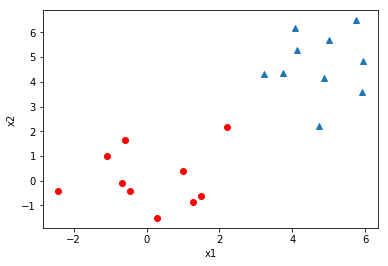

In [2]:
# xg0, xg1をプロットしてみる
plt.plot(xg0[:,0],xg0[:,1],'ro')
plt.plot(xg1[:,0],xg1[:,1],'^')
plt.xlabel("x1")
plt.ylabel("x2")

In [3]:
# xg0とxg1を連結して１つのデータにする
x = np.concatenate((xg0, xg1), axis = 0)
print(x)

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]
 [-0.57860025  1.65143654]
 [-2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897]
 [ 1.49138963 -0.638902  ]
 [-0.44398196 -0.43435128]
 [ 2.20593008  2.18678609]
 [ 1.0040539   0.3861864 ]
 [ 5.73736858  6.49073203]
 [ 4.06416613  6.17582904]
 [ 3.74611933  4.3622485 ]
 [ 5.9071052   3.5713193 ]
 [ 4.85993128  4.1382451 ]
 [ 4.74438063  2.20141089]
 [ 3.2284669   4.30012277]
 [ 5.92746243  4.82636432]
 [ 5.00284592  5.68822271]
 [ 4.12046366  5.28362732]]


In [4]:
#モデル定義
w = np.zeros(d)
b = 0

def y(x):
    return step(np.dot(w, x) + b)

def step(x):
    return 1 * (x > 0)

# 正しい出力値を返す関数
def t(i):
    if i < N:
        return 0
    else:
        return 1

# 学習前の初期値
print("w:", w)
print("b:", b)

w: [ 0.  0.]
b: 0


In [5]:
# 学習実施
epoc = 1
while True:
    classified = True
    #for i in range(N * 2):
    for i in range(len(x)):
        print("epoc:%03d" % (epoc))
        print(" data:%02d, x:%s, w:%s, b:%d, y:%d, t:%d" % (i, str(x[i]), str(w), b, y(x[i]), t(i)))
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
        print("           delta_w:%s, delta_b:%d, classified:%d" % (str(delta_w), delta_b, classified))
        epoc += 1
    if classified:
        print("**** ALL DATA CLASSIFIED CORRECTLY ****")
        break
    print("--- ALL DATA NOT CLASSIFIED CORRECTLY. ONE MORE LOOP ---")

epoc:001
 data:00, x:[-1.0856306   0.99734545], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:002
 data:01, x:[ 0.2829785  -1.50629471], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:003
 data:02, x:[-0.57860025  1.65143654], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:004
 data:03, x:[-2.42667924 -0.42891263], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0. -0.], delta_b:0, classified:1
epoc:005
 data:04, x:[ 1.26593626 -0.8667404 ], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:006
 data:05, x:[-0.67888615 -0.09470897], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0. -0.], delta_b:0, classified:1
epoc:007
 data:06, x:[ 1.49138963 -0.638902  ], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:008
 data:07, x:[-0.44398196 -0.43435128], w:[ 0.  0.], b:0, y:0, t:0
           delta_w:[-0

 data:16, x:[ 3.2284669   4.30012277], w:[ 5.97363736  7.30140141], b:-6, y:1, t:1
           delta_w:[ 0.  0.], delta_b:0, classified:0
epoc:098
 data:17, x:[ 5.92746243  4.82636432], w:[ 5.97363736  7.30140141], b:-6, y:1, t:1
           delta_w:[ 0.  0.], delta_b:0, classified:0
epoc:099
 data:18, x:[ 5.00284592  5.68822271], w:[ 5.97363736  7.30140141], b:-6, y:1, t:1
           delta_w:[ 0.  0.], delta_b:0, classified:0
epoc:100
 data:19, x:[ 4.12046366  5.28362732], w:[ 5.97363736  7.30140141], b:-6, y:1, t:1
           delta_w:[ 0.  0.], delta_b:0, classified:0
--- ALL DATA NOT CLASSIFIED CORRECTLY. ONE MORE LOOP ---
epoc:101
 data:00, x:[-1.0856306   0.99734545], w:[ 5.97363736  7.30140141], b:-6, y:0, t:0
           delta_w:[-0.  0.], delta_b:0, classified:1
epoc:102
 data:01, x:[ 0.2829785  -1.50629471], w:[ 5.97363736  7.30140141], b:-6, y:0, t:0
           delta_w:[ 0. -0.], delta_b:0, classified:1
epoc:103
 data:02, x:[-0.57860025  1.65143654], w:[ 5.97363736  7.30140141],

In [6]:
# 学習した結果の値
print("w:", w)
print("b:", b)

w: [ 2.14037745  1.2763927 ]
b: -9


+ 学習した結果、w1=2.14037745、w2=1.2763927、b=-9が得られた
+ モデル式：y = w1*x1 + w2*x2 +b　→ 0 = 2.14037745*x1 + 1.2763927*x2 -9 がニューロンが発火するかどうかの境界線

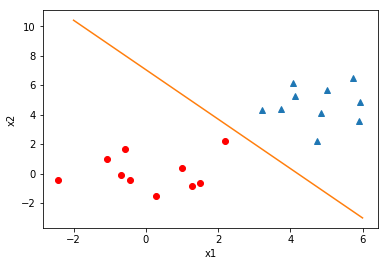

In [7]:
#もう一度xg0, xg1をプロット
plt.plot(xg0[:,0],xg0[:,1],'ro')
plt.plot(xg1[:,0],xg1[:,1],'^')
plt.xlabel("x1")
plt.ylabel("x2")

#算出した値で境界線を描画
#x1の値域 -2から6まで4点（x1の範囲に合わせる。描画する数は適当でOK）
x1 = np.linspace(-2,6,4)
x2 = -(2.14037745 / 1.276392) * x1 + (9.0 / 1.276392)
plt.plot(x1, x2, "-")

## 3.4 ロジスティック回帰

※8/12作業中

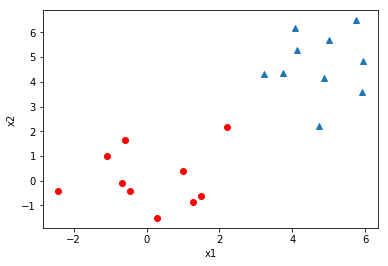

In [8]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#単純パーセプトロンと同じデータを使用する
d = 2
N = 10
mean = 5
rng = np.random.RandomState(123)
xg0 = rng.randn(N, d) + np.array([0, 0])
xg1 = rng.randn(N, d) + np.array([mean, mean])
plt.plot(xg0[:,0],xg0[:,1],'ro')
plt.plot(xg1[:,0],xg1[:,1],'^')
plt.xlabel("x1")
plt.ylabel("x2")

In [9]:
'''
モデル設定
'''
tf.set_random_seed(0)  # 乱数シード

w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)



In [10]:
#データセット
# xのshape=[None, 2]に合わせる
X = np.concatenate((xg0, xg1), axis = 0)
print(X.shape)
# tのshape=[None, 1]に合わせる
yg0 = np.zeros((N,1))
yg1 = np.ones((N,1))
print(yg0)
print(yg1)
Y = np.concatenate((yg0, yg1), axis = 0)
print(Y.shape)

(20, 2)
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
(20, 1)


In [11]:
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# 学習
for epoch in range(20):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    print("epoc:" ,epoch)
    print("   w:" ,sess.run(w))
    print("   b:" ,sess.run(b))


print("**** train finish ****")
print("w:" ,sess.run(w))
print("b:" ,sess.run(b))


epoc: 0
   w: [[ 2.31509018]
 [ 2.28931379]]
   b: [ 0.]
epoc: 1
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 2
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 3
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 4
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 5
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 6
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 7
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 8
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 9
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 10
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 11
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 12
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 13
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 14
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 15
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 16
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 17
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 18
   w: [[ nan]
 [ nan]]
   b: [ nan]
epoc: 19
   w: [[ nan]
 [ nan]]
   b: [ nan]
**** train finish ****
w: [[ nan]
 [ nan]]
b: [ nan]


In [12]:
'''
学習結果の確認
'''
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]

output probability:
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]


In [13]:
import numpy as np
import tensorflow as tf

'''
モデル設定
'''
tf.set_random_seed(0)  # 乱数シード

w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

'''
モデル学習
'''
# ORゲート
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#Y = np.array([[0], [1], [1], [1]])
Y = np.array([0, 1, 1, 1])
Y = Y.reshape(4,1)


# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 学習
for epoch in range(200):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })

'''
学習結果の確認
'''
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]
